In [1]:
!pip install -U protobuf==3.8.0

Requirement already up-to-date: protobuf==3.8.0 in ./lib/python3.6/site-packages (3.8.0)


#### Import Tensorflow Framework and other important statistical libraries

In [2]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import pathlib
import glob
import shutil


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

Using TensorFlow backend.


In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#### Import Matplotlib data visualization statistical library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

#### Confirm the Tensorlow version

In [5]:
print(tf.__version__)

2.1.0


#### Declare Image sizes and Training Batches

In [6]:
BATCH_SIZE = 32
IMG_HEIGHT = 32
IMG_WIDTH = 32

#### Maize Classification Classes and load image directory

In [7]:
data_dir = "/home/dickens/Documents/PROJECT/Images"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = ['Gray Leaf Spot','Healthy','Maize Common Smut','Maize Streak Virus','Northern Leaf Blight']

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Gray Leaf Spot', 'Healthy', 'Maize Common Smut', 'Maize Streak Virus', 'Northern Leaf Blight']


In [8]:
#Group into train, test and validation sets
for cl in CLASS_NAMES:
    data_path = os.path.join(data_dir, cl)
    images = glob.glob(data_path + "/*")
    print("{} :{} ".format(cl,len(images)))
    train, val = images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    for t in train:
        if not os.path.exists(os.path.join(data_dir, 'train', cl)):
            os.makedirs(os.path.join(data_dir, 'train', cl))
        shutil.move(t,os.path.join(data_dir, 'train', cl))
        
    for v in val:
        if not os.path.exists(os.path.join(data_dir, 'val', cl)):
            os.makedirs(os.path.join(data_dir, 'val', cl))
        shutil.move(v,os.path.join(data_dir, 'val', cl))
    
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

Gray Leaf Spot :0 
Healthy :0 
Maize Common Smut :0 
Maize Streak Virus :0 
Northern Leaf Blight :0 


In [9]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_dir,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(val_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 1332 images belonging to 5 classes.
Found 334 images belonging to 5 classes.


In [10]:
def plotImages(img_arr):
    fig,axes = plt.subplots(1, 5,  figsize = (50, 50))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

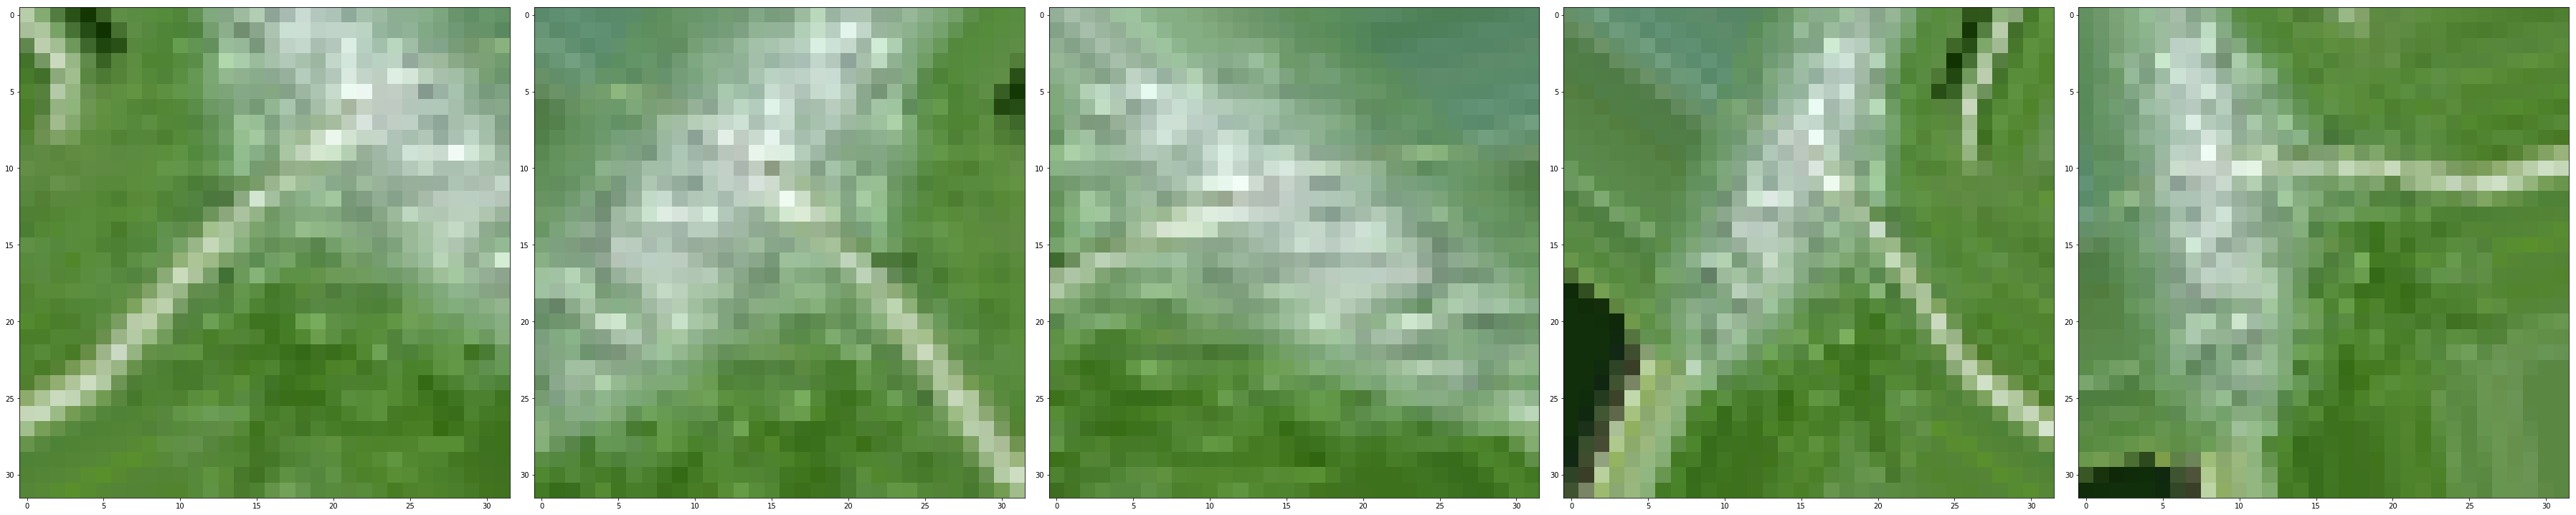

In [11]:
#plot a few train images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

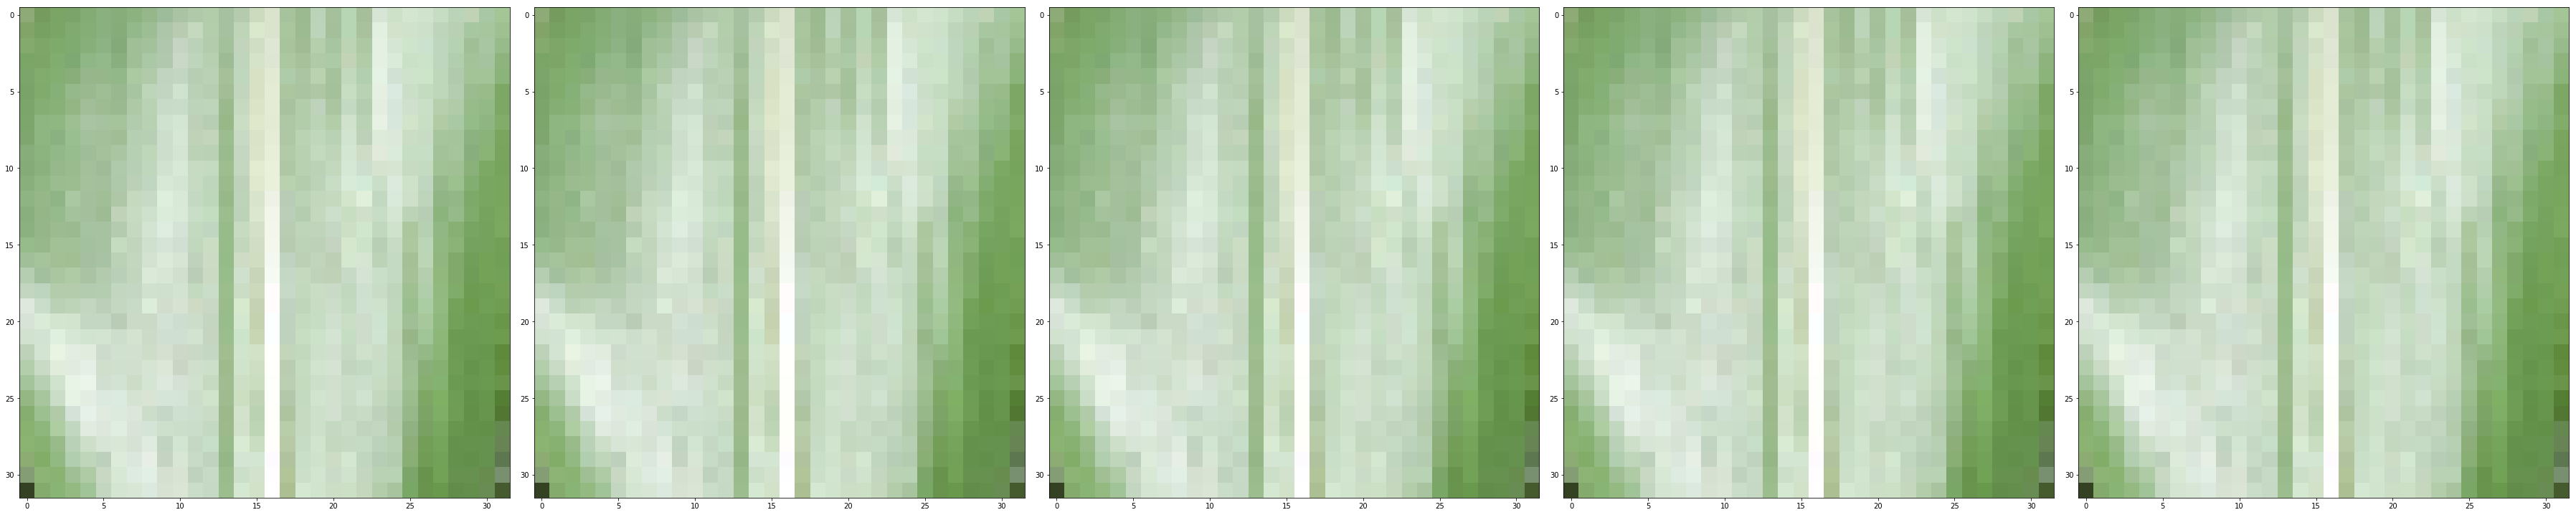

In [12]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [13]:
def BuildClassificationModel():
    model = Sequential()
    model.add(Conv2D(16,(3, 3),input_shape= (IMG_HEIGHT,IMG_WIDTH,3), name ='classifier_input'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2),name='pool_layer_1'))
    model.add(Conv2D(32, (3,3), name = 'conv_layer_2'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2), name = 'pool_layer_2'))
    model.add(Conv2D(64, (3, 3), name = 'conv_layer_3'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), name='pool_layer_3'))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(128, kernel_initializer="random_uniform",bias_initializer="zeros", name='full_con_layer_one'))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(5, name ='classifier_output'))
    model.add(Activation('softmax'))

    return model

In [14]:
model = BuildClassificationModel()

In [15]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
classifier_input (Conv2D)    (None, 30, 30, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 16)        0         
_________________________________________________________________
pool_layer_1 (MaxPooling2D)  (None, 15, 15, 16)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 13, 13, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
pool_layer_2 (MaxPooling2D)  (None, 6, 6, 32)          0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 4, 4, 64)          1

In [16]:
EPOCHS = 50
history = model.fit_generator(train_data_gen, epochs = EPOCHS, validation_data = val_data_gen,
                             callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./Classifier-2020/logs/Tensorboard-visualization', histogram_freq=1, batch_size= BATCH_SIZE, write_graph=True, write_grads=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 42 steps, validate for 11 steps
Epoch 1/50
42/42 [==============================] - 17s 397ms/step - loss: 1.3528 - accuracy: 0.3574 - val_loss: 1.1499 - val_accuracy: 0.5599
Epoch 2/50
42/42 [==============================] - 6s 138ms/step - loss: 0.9340 - accuracy: 0.6539 - val_loss: 0.6687 - val_accuracy: 0.7754
Epoch 3/50
42/42 [==============================] - 6s 141ms/step - loss: 0.7090 - accuracy: 0.7928 - val_loss: 0.5147 - val_accuracy: 0.8353
Epoch 4/50
42/42 [==============================] - 6s 145ms/step - loss: 0.6212 - accuracy: 0.8153 - val_loss: 0.4209 - val_accuracy: 0.8743
Epoch 5/50
42/42 [==============================] - 6s 139ms/step - loss: 0.5938 - accuracy: 0.8251 - val_loss: 0.4379 - val_accuracy: 0.8683
Epoch 6/50
42/42 [==============================] - 6s 143ms/step - loss: 0.5451 - accuracy: 0.8371 - val_loss: 0.4404 - 

In [17]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

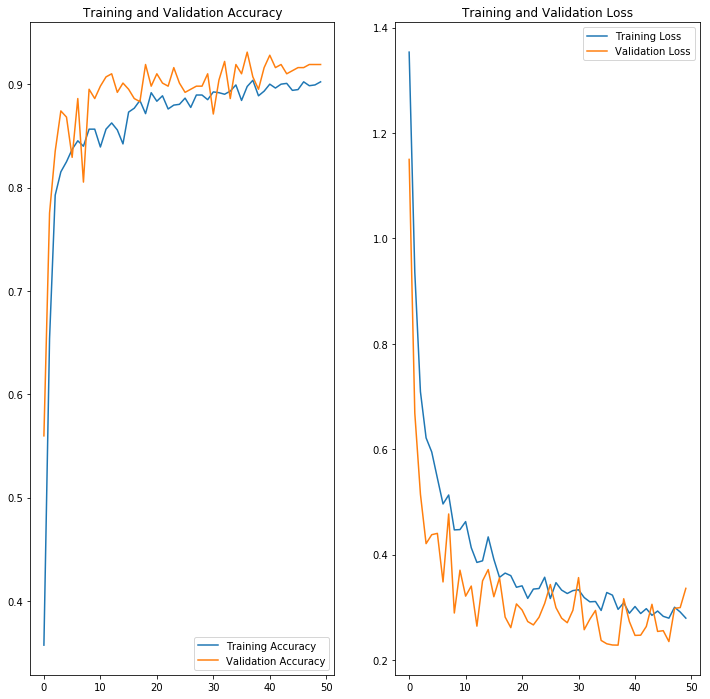

In [18]:
#plot training and validation graphs
epochs_range = range(EPOCHS)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
#save the tflite model
export_dir = 'Classifier-2020/saved_model/'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Classifier-2020/saved_model/assets


In [20]:
#optimize the model for inference
mode = "Storage"

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

<Optimize.OPTIMIZE_FOR_SIZE: 'OPTIMIZE_FOR_SIZE'>

In [21]:
#convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [22]:
# Save the converted model tflite file
tflite_model_file = 'maize_classifier.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

with open('maize_classifier_labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))

!ls

 bin				  'MAIZE DISEASE CLASSIFIER-2020.ipynb'
 Classifier-2020		   man
 compiler_compat		   mkspecs
 condabin			   model.tflite
 conda-meta			   phrasebooks
 dickens-project-modelling.ipynb   plugins
 doc				   qml
 docs				   sbin
 etc				   share
 fonts				   shell
 include			   ssl
 labels.txt			   translations
 lib				   Untitled1.ipynb
 lib64				   Untitled.ipynb
 libexec			   var
 maize_classifier_labels.txt	   x86_64-conda_cos6-linux-gnu
 maize_classifier.tflite


In [23]:
# Test the TFLITE model
interpretor = tf.lite.Interpreter(model_content=tflite_model)
interpretor.allocate_tensors()

#details
input_index = interpretor.get_input_details()[0]["index"]
output_index = interpretor.get_output_details()[0]["index"]

In [24]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [25]:
test_batches = tf.data.Dataset.list_files(str(data_dir/'train/*/*'))

test_batches = test_batches.map(process_path).batch(1).prefetch(1)

for img, label in test_batches.take(32):
  interpretor.set_tensor(input_index, img)
  interpretor.invoke()
  predict = interpretor.get_tensor(output_index)
  print("Predicted: {} - {:2.0f}% : True: {}".format(CLASS_NAMES[np.argmax(predict)],
                                                     100*np.max(predict),
                                                     CLASS_NAMES[label[0].numpy() == 1]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(5)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('{}/test_images/{}_{}.jpg'.format(data_dir,CLASS_NAMES[label[0].numpy()==1][0].lower(), index))